In [26]:
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy import io


### Setup


In [2]:
os.chdir("..")
os.getcwd()

'c:\\Users\\delgr\\Projects\\advancedPython\\Day6a'

### Set Script Parameters

In [ ]:
in_file = "data/raw/20161214_cori_steinmetz/wheel.mat"
in_file

'data/raw/20161214_cori_steinmetz/wheel.mat'

In [ ]:
path = Path(in_file)
assert path.exists()

### Load Data

In [ ]:
data = io.loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sun Apr  6 15:33:00 2025',
 '__version__': '1.0',
 '__globals__': [],
 'wheel': array([[-1,  0,  0, ...,  0,  0,  0]], shape=(1, 91000), dtype=int8),
 'time': array([[    0,    10,    20, ..., 58002, 58012, 58022]],
       shape=(1, 91000), dtype=uint16)}

### Extract Variables

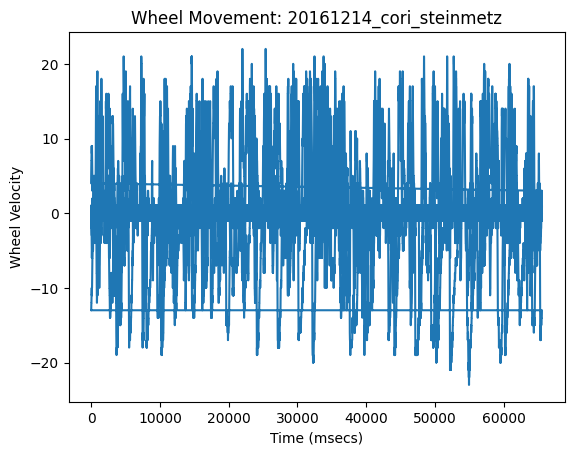

In [ ]:
wheel = data['wheel'].flatten()
time = data['time'].flatten()

plt.plot(time, wheel);
plt.gca().set(
    title=f'Wheel Movement: {path.parent.stem}',
    xlabel='Time (msecs)',
    ylabel='Wheel Velocity'
);

### Save Extracted Data and Add Metadata

In [23]:
savedir = Path(f"data/extracted/{path.parent.name}/wheel")
savedir.mkdir(exist_ok=True, parents=True)
savedir

WindowsPath('data/extracted/20161214_cori_steinmetz/wheel')

In [ ]:

np.save(savedir / 'wheel.npy', wheel, allow_pickle=False)
wheel_mdata = {
    'notes': "Positive is rightward movement."
}
(savedir / 'wheel.json').write_text(json.dumps(wheel_mdata, indent=3))

np.save(savedir / 'time.npy', time, allow_pickle=False)
time_mdata = {
    'units': 'msecs'
}
(savedir / 'time.json').write_text(json.dumps(time_mdata, indent=3))


23